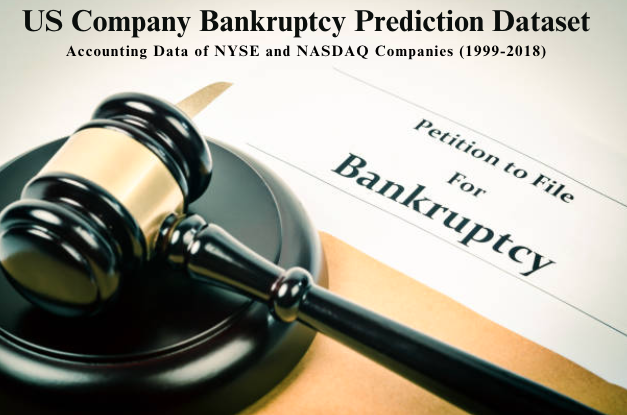

# Individual Project

https://www.canva.com/design/DAFlLI4wm6o/GtorVwnRsBU21UGUnFznEw/edit

## Workflow
1. Import

2. Acquire Data

3. Clean, Prep & Split Data

4. Explore Data
    - Hypothesis Testing
    
5. Feature Importance

6. Modeling
    - Identify Baseline
    - Model on Train
    - Model on Validate
    - Model on Test

8. Conclusion

## Imports

In [1]:
# standard imports
import pandas as pd
import numpy as np

# this is to open the dataset/download the keggal dataset
import opendatasets as od
import os

# time imports
from datetime import timedelta, datetime

# sklearn imports
from scipy.stats import pearsonr, spearmanr, f_oneway, ttest_ind
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# visualized your data
import matplotlib.pyplot as plt
import seaborn as sns

# my imports
import wrangle as w
import explore as e
import modeling as m

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Acquire
- Data acquired from [Kaggle](https://gist.githubusercontent.com/rosendo-lugo/8138692acade48da91cf1c80687f0779/raw/american_bankruptcy.csv)
- Created a Github Gists link to provide a simple way of downloading the file.
    Downloaded .csv file: american_bankruptcy.csv
- It contained 78,682 rows and 21 columns before cleaning
    - 73,462 rows were alive
    - 5,220 rows were failed
- The dataset covers the period from 1999 to 2018 and includes accounting data from 8,262 distinct companies.
- Each row represents company status by year
- Each column represents financial indicators of these companies

## Prepare
- Did not remove any columns
- Did rename all X(num) columns to the appropiate name
- Checked for nulls - no null values found and created a columns for missing percentage
- Checked for unique values - created a columns in the summary dataframe to show the unique values
- Checked that column data types were appropriate
- Outliers: No outliers were removed
- Map categorical variables
- Split data into train, validate, and test (60/20/20)
- Scaled continuous variables

## Data Dictionary

| Variable Name            | Description                                                                                                     |
|--------------------------|--------------------------------------------------------------------------------------------------------|
| X1                       | Current assets - All the assets of a company that are expected to be sold or used as a result of standard business operations over the next year. |
| X2                       | Cost of goods sold - The total amount a company paid as a cost directly related to the sale of products.                                                        |
| X3                       | Depreciation and amortization - Depreciation refers to the loss of value of a tangible fixed asset over time (such as property, machinery, buildings, and plant). Amortization refers to the loss of value of intangible assets over time.  |
| X4                       | EBITDA - Earnings before interest, taxes, depreciation, and amortization. It is a measure of a company's overall financial performance, serving as an alternative to net income. |
| X5                       | Inventory - The accounting of items and raw materials that a company either uses in production or sells.                                                       |
| X6                       | Net Income - The overall profitability of a company after all expenses and costs have been deducted from total revenue.                                        |
| X7                       | Total Receivables - The balance of money due to a firm for goods or services delivered or used but not yet paid for by customers.                                |
| X8                       | Market value - The price of an asset in a marketplace. In this dataset, it refers to the market capitalization since companies are publicly traded in the stock market. |
| X9                       | Net sales - The sum of a company's gross sales minus its returns, allowances, and discounts.                                                                       |
| X10                      | Total assets - All the assets, or items of value, a business owns.                                                                                                 |
| X11                      | Total Long-term debt - A company's loans and other liabilities that will not become due within one year of the balance sheet date.                               |
| X12                      | EBIT - Earnings before interest and taxes.                                                                                                                         |
| X13                      | Gross Profit - The profit a business makes after subtracting all the costs that are related to manufacturing and selling its products or services.               |
| X14                      | Total Current Liabilities - The sum of accounts payable, accrued liabilities, and taxes such as Bonds payable at the end of the year, salaries, and commissions remaining.       |
| X15                      | Retained Earnings - The amount of profit a company has left over after paying all its direct costs, indirect costs, income taxes, and its dividends to shareholders. |
| X16                      | Total Revenue - The amount of income that a business has made from all sales before subtracting expenses. It may include interest and dividends from investments.     |
| X17                      | Total Liabilities - The combined debts and obligations that the company owes to outside parties.                                                                   |
| X18                      | Total Operating Expenses - The expenses a business incurs through its normal business operations.                                                                   |


In [2]:
url = 'https://gist.githubusercontent.com/rosendo-lugo/8138692acade48da91cf1c80687f0779/raw/american_bankruptcy.csv'

In [3]:
df = pd.read_csv(url)

## A summary of the data

In [4]:
w.data_summary(df)

data shape: (78682, 21)


,data type,#missing,%missing,#unique,count,mean,std,min,25%,50%,75%,max
company_name,object,0,0.0,8971,78682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status_label,object,0,0.0,2,78682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,int64,0,0.0,20,78682.0,2007.506317,5.742768,1999.0,2002.0,2007.0,2012.0,2018.0
x1,float64,0,0.0,65895,78682.0,880.362485,3928.564794,-7.76,18.924,100.4495,431.52675,169662.0
x2,float64,0,0.0,65690,78682.0,1594.529029,8930.484664,-366.645,17.03825,103.661,634.548,374623.0
x3,float64,0,0.0,36010,78682.0,121.234256,652.376804,0.0,1.192,7.9295,47.97175,28430.0
x4,float64,0,0.0,59060,78682.0,376.759424,2012.023142,-21913.0,-0.811,15.0345,139.65525,81730.0
x5,float64,0,0.0,38898,78682.0,201.605717,1060.766096,0.0,0.0,7.023,74.74725,62567.0
x6,float64,0,0.0,55550,78682.0,129.382453,1265.532022,-98696.0,-7.41575,1.616,40.14425,104821.0
x7,float64,0,0.0,49577,78682.0,286.832743,1335.978571,-0.006,3.28125,22.82,131.5805,65812.0


## Prepare the DATA

In [5]:
df = w.prep_data(df)

In [6]:
df

,company_name,status_label,year,current_assets,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,net_income,total_receivables,...,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
0,C_1,1,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,1,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,1,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,1,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,1,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,1,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,1,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,1,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


## 

In [7]:
target = 'status_label'

In [8]:
# baseline
df['baseline_pred'] = df.status_label.mode()[0]

In [9]:
tr, val, ts = w.get_split(df)
tr.shape, val.shape, ts.shape

((47208, 20), (15737, 20), (15737, 20))

In [10]:
X_tr, X_val, X_ts, y_tr, y_val, y_ts, to_scale, baseline = w.get_Xs_ys_to_scale_baseline(tr, val, ts, target)

In [11]:
X_tr_sc, X_val_sc, X_ts_sc = w.scale_data(X_tr,X_val,X_ts,to_scale)

# Explore

### What is the distribution of the target?

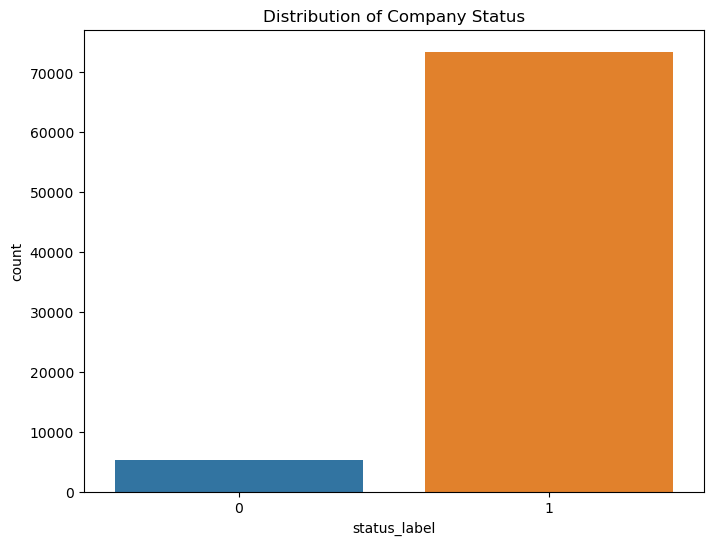

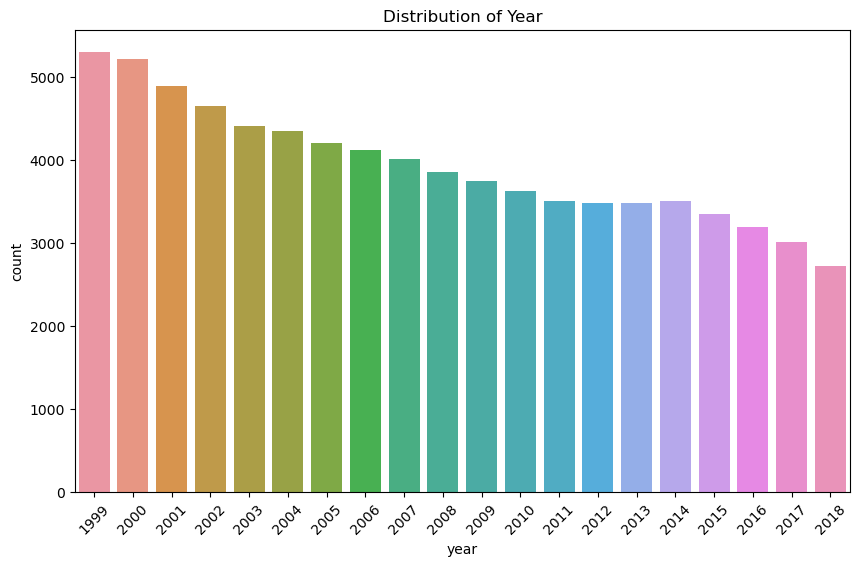

In [12]:
# Checking the distribution of 'status_label' column
plt.figure(figsize=(8, 6))
sns.countplot(x='status_label', data=df)
plt.title('Distribution of Company Status')
plt.show()

# Checking the distribution of 'year' column
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df)
plt.title('Distribution of Year')
plt.xticks(rotation=45)
plt.show()

### Pair Plot

In [13]:
# sns.pairplot(df)

## Correlation Matrix

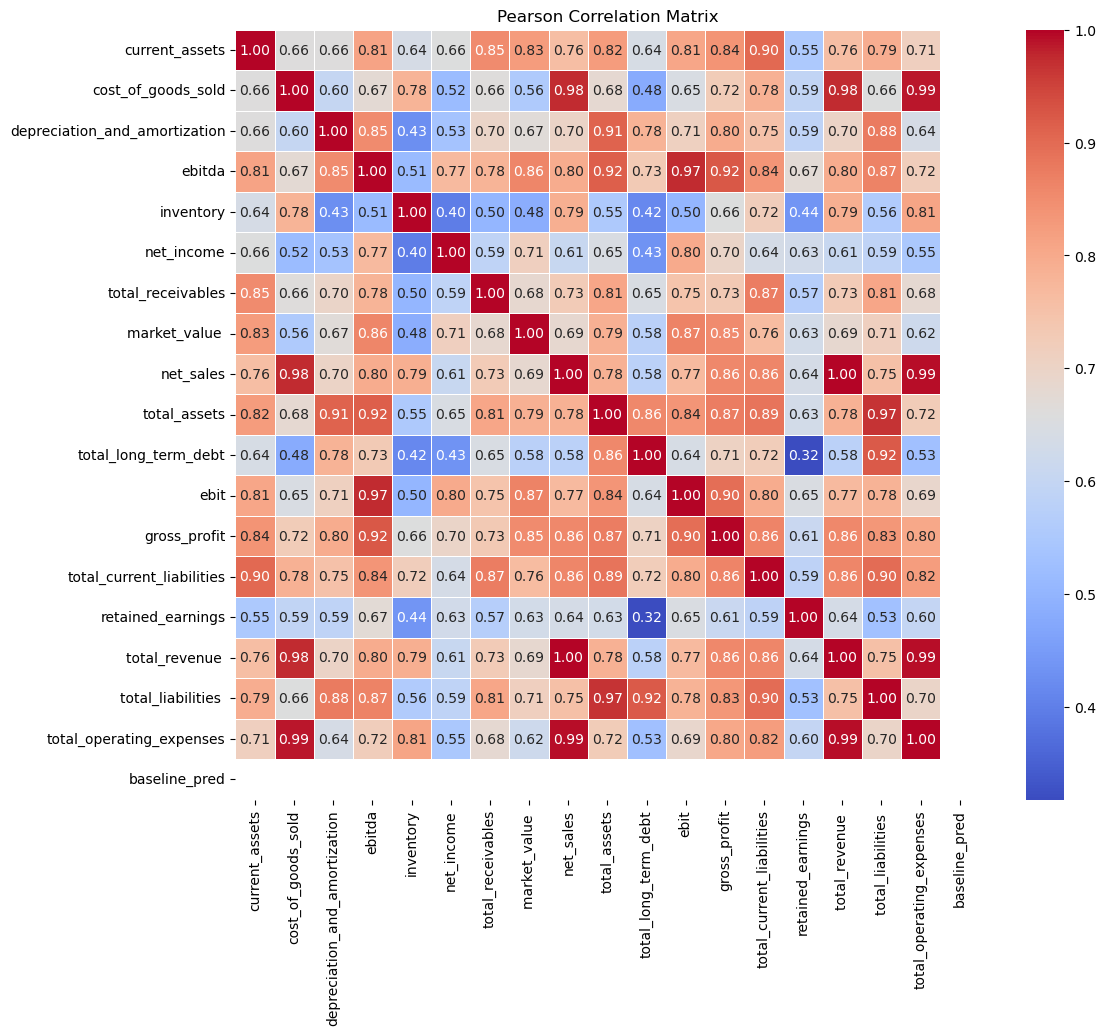

In [14]:
list_col = list(df.columns)
data = df[list_col[3:]]
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Matrix')

plt.show()

In [15]:
# Identifying numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

### Univariate exploration 

In [16]:
object_cols = e.get_object_cols(X_tr)

In [17]:
num_cols = e.get_numeric_cols(X_tr)

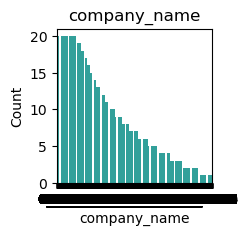

       company_name  Count  Percent
C_4081          C_1     20     0.03
C_6487          C_2     20     0.03
C_1153          C_3     20     0.03
C_4047          C_4     20     0.03
C_4056          C_5     20     0.03
...             ...    ...      ...
C_1498       C_8967      1     0.00
C_5908       C_8968      1     0.00
C_2814       C_8969      1     0.00
C_3997       C_8970      1     0.00
C_3408       C_8971      1     0.00

[8971 rows x 3 columns]
______________________________________________________________________________________


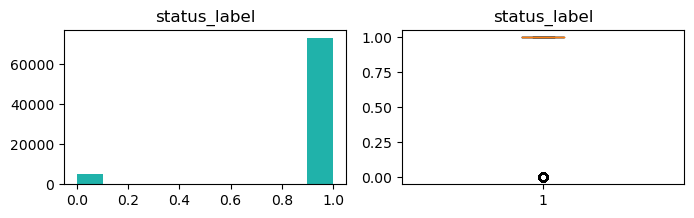

count    78682.000000
mean         0.933657
std          0.248882
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: status_label, dtype: float64
______________________________________________________________________________________


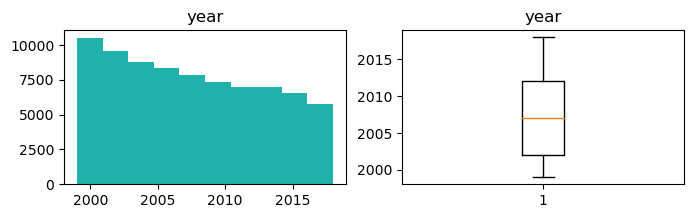

count    78682.000000
mean      2007.506317
std          5.742768
min       1999.000000
25%       2002.000000
50%       2007.000000
75%       2012.000000
max       2018.000000
Name: year, dtype: float64
______________________________________________________________________________________


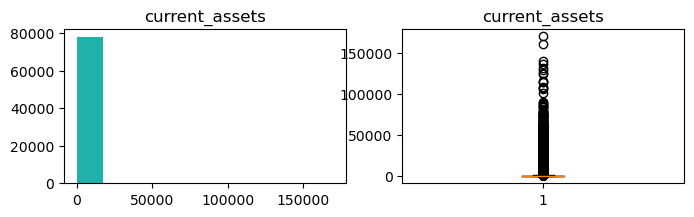

count     78682.000000
mean        880.362485
std        3928.564794
min          -7.760000
25%          18.924000
50%         100.449500
75%         431.526750
max      169662.000000
Name: current_assets, dtype: float64
______________________________________________________________________________________


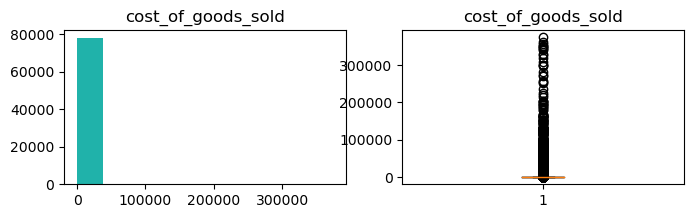

count     78682.000000
mean       1594.529029
std        8930.484664
min        -366.645000
25%          17.038250
50%         103.661000
75%         634.548000
max      374623.000000
Name: cost_of_goods_sold, dtype: float64
______________________________________________________________________________________


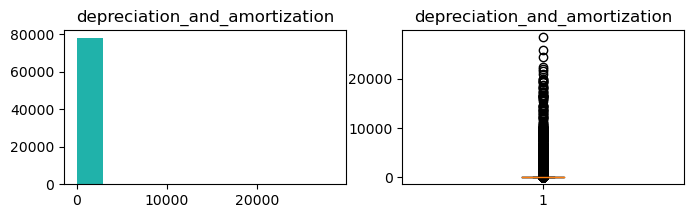

count    78682.000000
mean       121.234256
std        652.376804
min          0.000000
25%          1.192000
50%          7.929500
75%         47.971750
max      28430.000000
Name: depreciation_and_amortization, dtype: float64
______________________________________________________________________________________


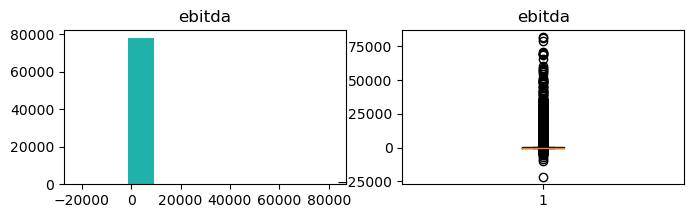

count    78682.000000
mean       376.759424
std       2012.023142
min     -21913.000000
25%         -0.811000
50%         15.034500
75%        139.655250
max      81730.000000
Name: ebitda, dtype: float64
______________________________________________________________________________________


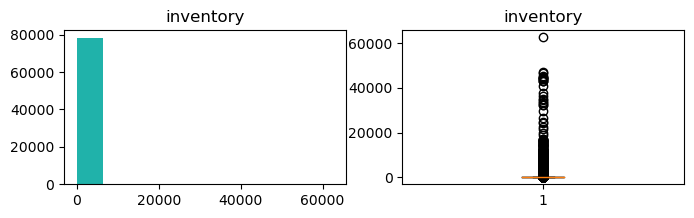

count    78682.000000
mean       201.605717
std       1060.766096
min          0.000000
25%          0.000000
50%          7.023000
75%         74.747250
max      62567.000000
Name: inventory, dtype: float64
______________________________________________________________________________________


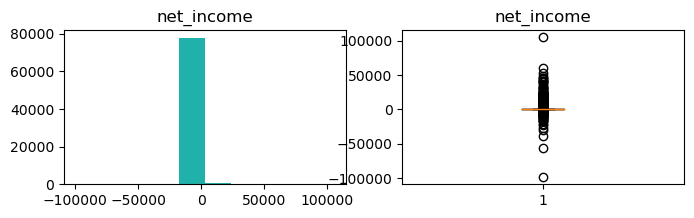

count     78682.000000
mean        129.382453
std        1265.532022
min      -98696.000000
25%          -7.415750
50%           1.616000
75%          40.144250
max      104821.000000
Name: net_income, dtype: float64
______________________________________________________________________________________


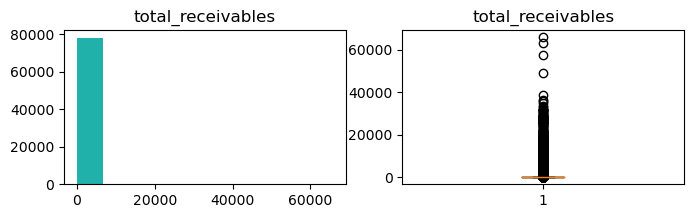

count    78682.000000
mean       286.832743
std       1335.978571
min         -0.006000
25%          3.281250
50%         22.820000
75%        131.580500
max      65812.000000
Name: total_receivables, dtype: float64
______________________________________________________________________________________


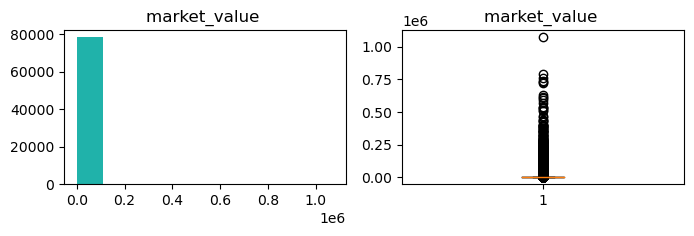

count    7.868200e+04
mean     3.414355e+03
std      1.841410e+04
min      1.000000e-04
25%      3.498000e+01
50%      2.275118e+02
75%      1.244890e+03
max      1.073391e+06
Name: market_value , dtype: float64
______________________________________________________________________________________


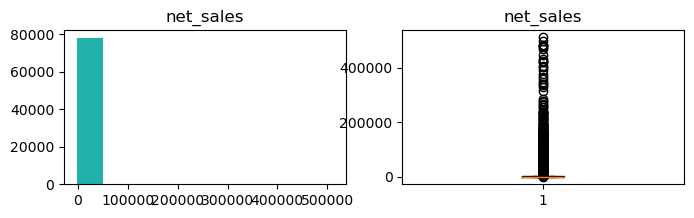

count     78682.000000
mean       2364.019706
std       11950.068842
min       -1964.999000
25%          27.548500
50%         186.598500
75%        1046.402500
max      511729.000000
Name: net_sales, dtype: float64
______________________________________________________________________________________


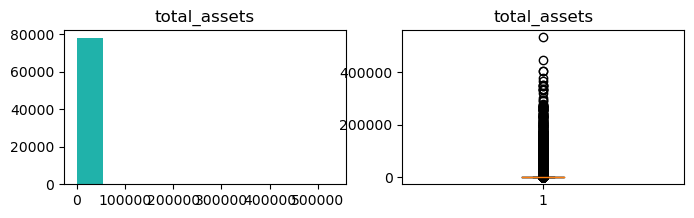

count     78682.000000
mean       2867.110620
std       12917.944421
min           0.001000
25%          37.363500
50%         213.203500
75%        1171.364750
max      531864.000000
Name: total_assets, dtype: float64
______________________________________________________________________________________


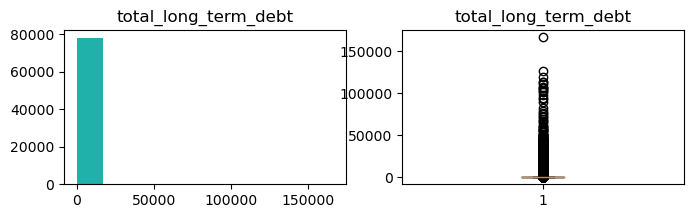

count     78682.000000
mean        722.483710
std        3242.170946
min          -0.023000
25%           0.000000
50%           7.593500
75%         248.760750
max      166250.000000
Name: total_long_term_debt, dtype: float64
______________________________________________________________________________________


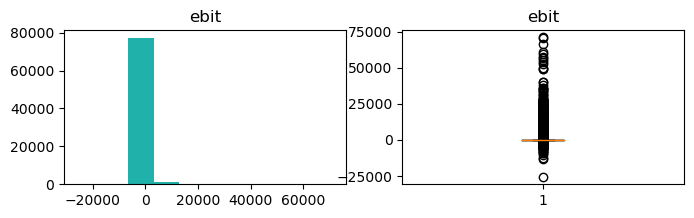

count    78682.000000
mean       255.525035
std       1494.643534
min     -25913.000000
25%         -2.787000
50%          6.518000
75%         87.599000
max      71230.000000
Name: ebit, dtype: float64
______________________________________________________________________________________


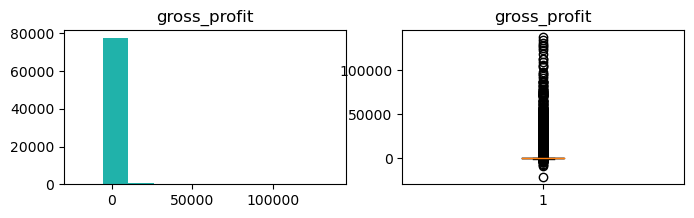

count     78682.000000
mean        769.490783
std        3774.703114
min      -21536.000000
25%           8.521250
50%          63.581500
75%         344.074250
max      137106.000000
Name: gross_profit, dtype: float64
______________________________________________________________________________________


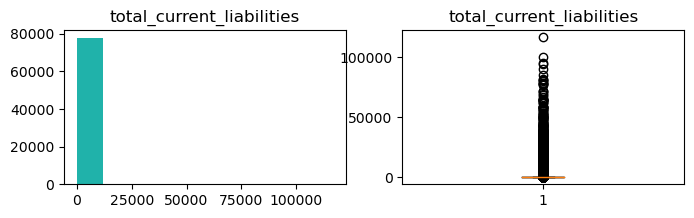

count     78682.000000
mean        610.072255
std        2938.387443
min           0.001000
25%           8.889250
50%          43.333000
75%         222.817000
max      116866.000000
Name: total_current_liabilities, dtype: float64
______________________________________________________________________________________


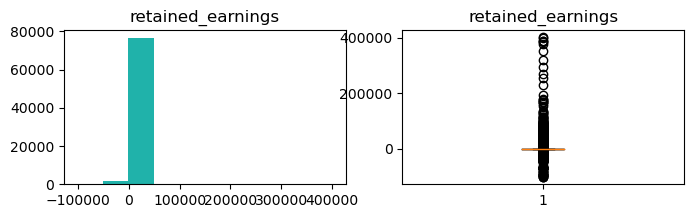

count     78682.000000
mean        532.467069
std        6369.159440
min     -102362.000000
25%         -68.282750
50%          -1.131000
75%         146.070000
max      402089.000000
Name: retained_earnings, dtype: float64
______________________________________________________________________________________


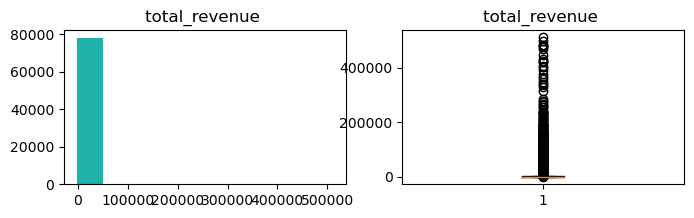

count     78682.000000
mean       2364.019706
std       11950.068842
min       -1964.999000
25%          27.548500
50%         186.598500
75%        1046.402500
max      511729.000000
Name: total_revenue , dtype: float64
______________________________________________________________________________________


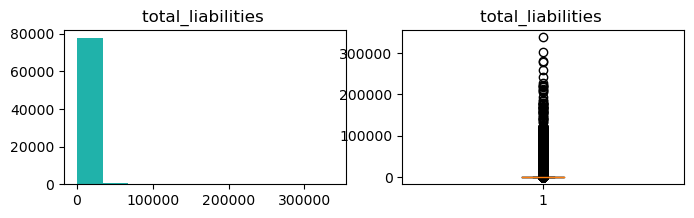

count     78682.000000
mean       1773.563963
std        8053.684902
min           0.001000
25%          13.486000
50%          81.988000
75%         629.975000
max      337980.000000
Name: total_liabilities , dtype: float64
______________________________________________________________________________________


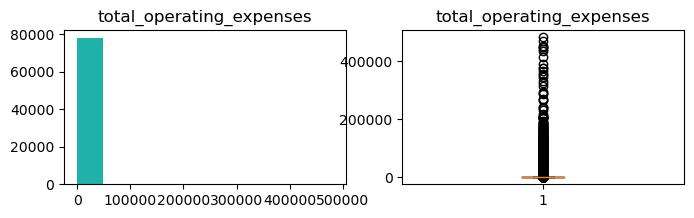

count     78682.000000
mean       1987.260307
std       10419.629038
min        -317.197000
25%          32.872500
50%         168.912000
75%         875.522250
max      481580.000000
Name: total_operating_expenses, dtype: float64
______________________________________________________________________________________


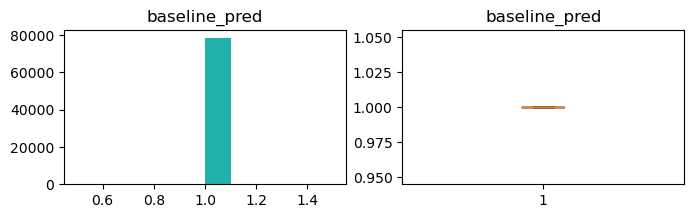

count    78682.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: baseline_pred, dtype: float64


In [18]:
# be patient it takes 24 seconds to run
e.explore_univariate(df, categorical_cols, numerical_cols)

## Bivariate exploration

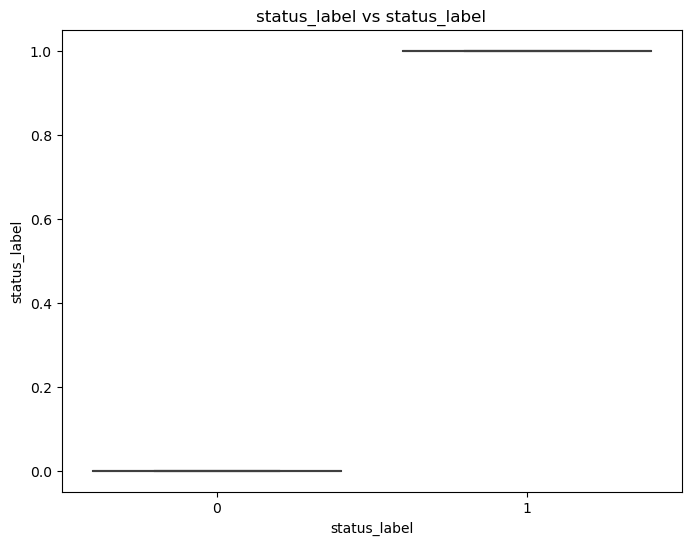

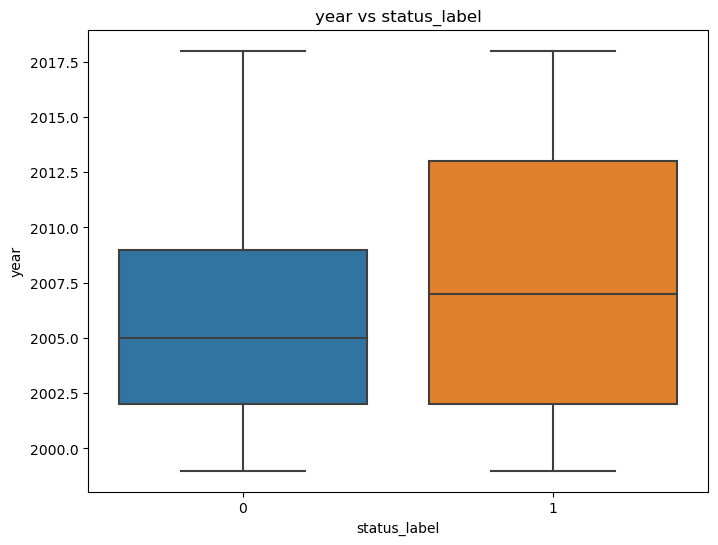

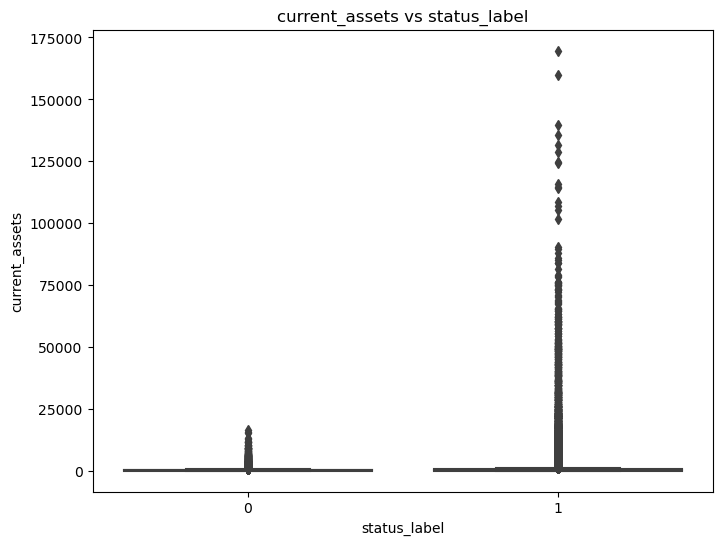

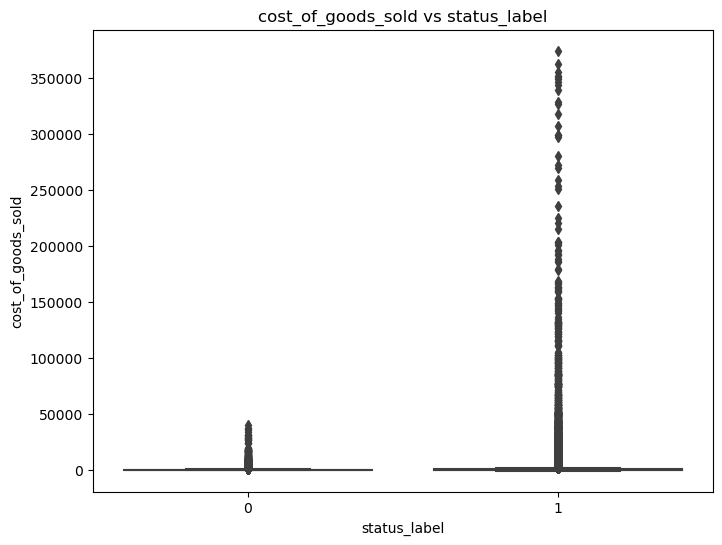

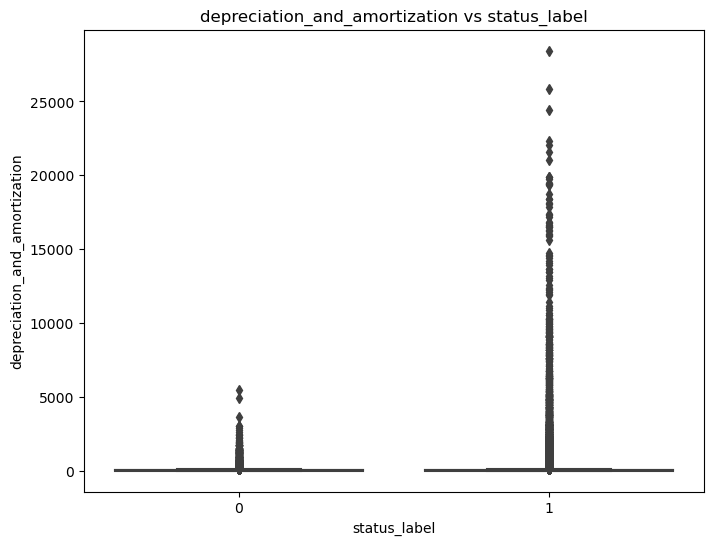

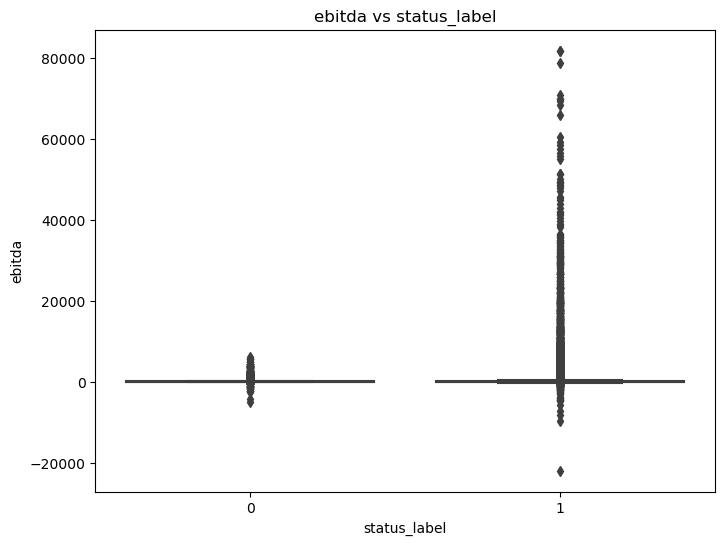

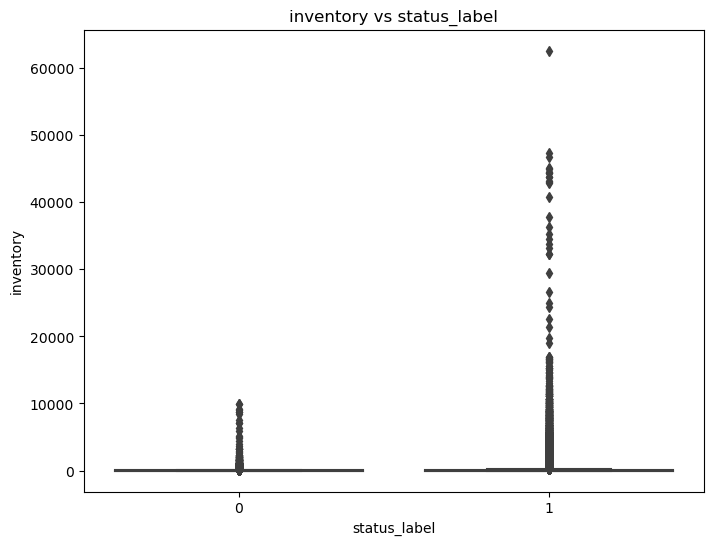

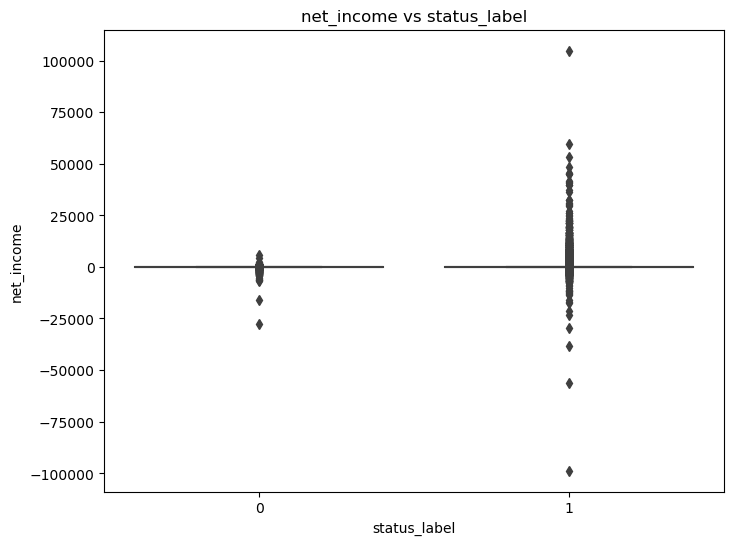

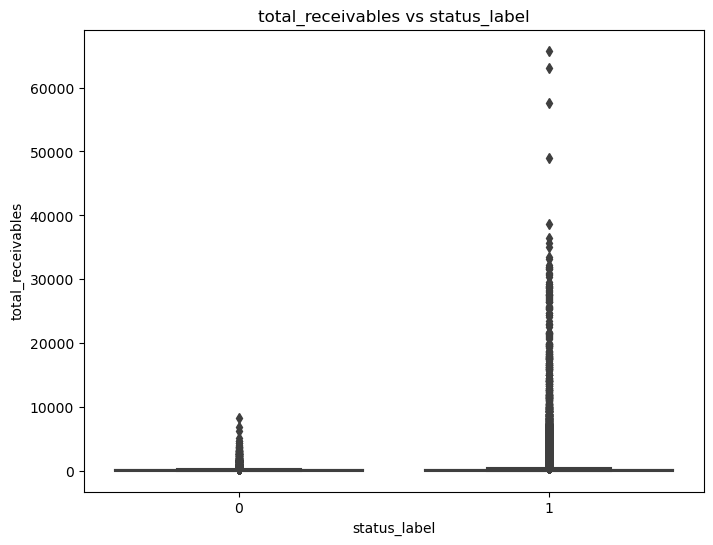

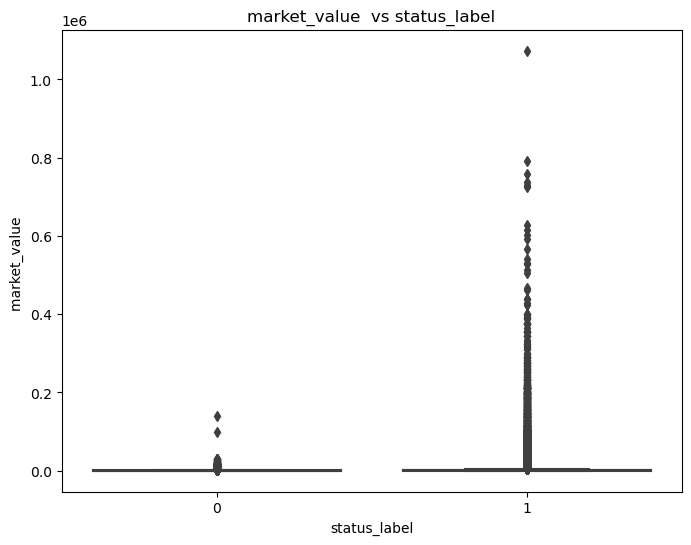

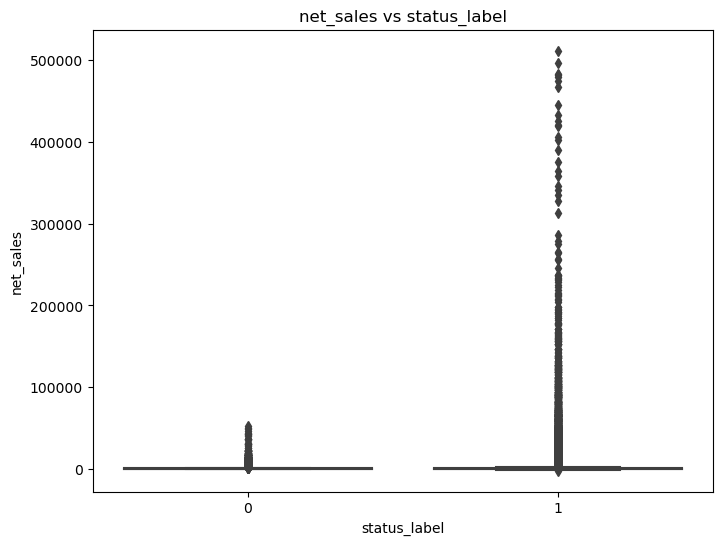

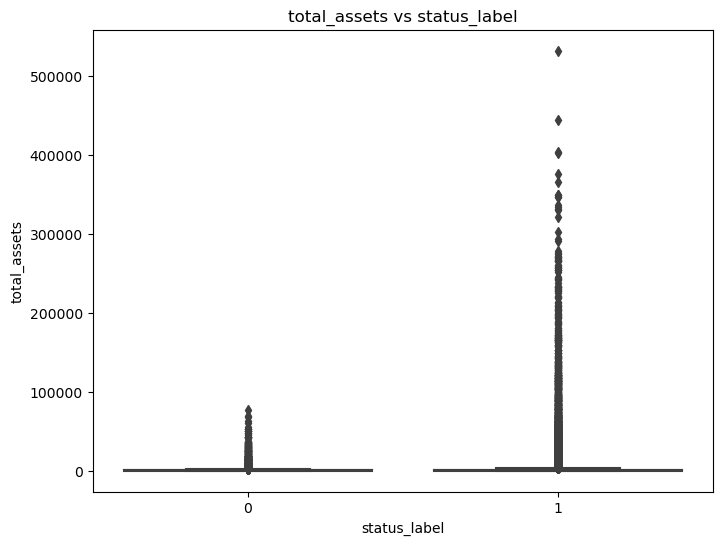

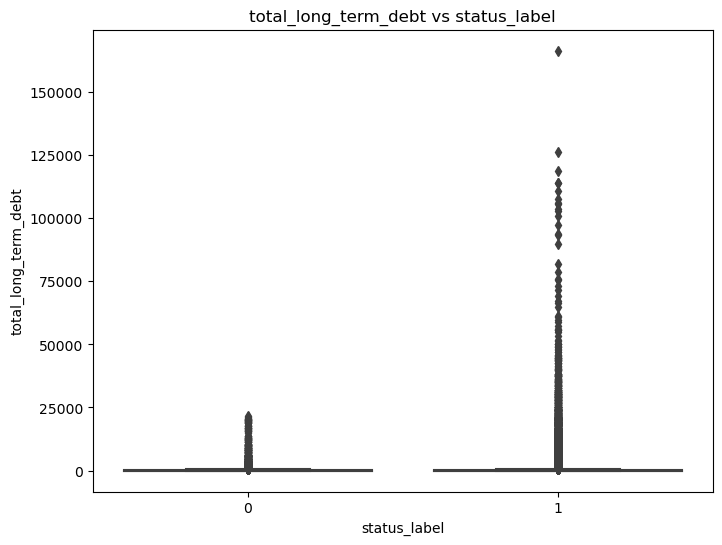

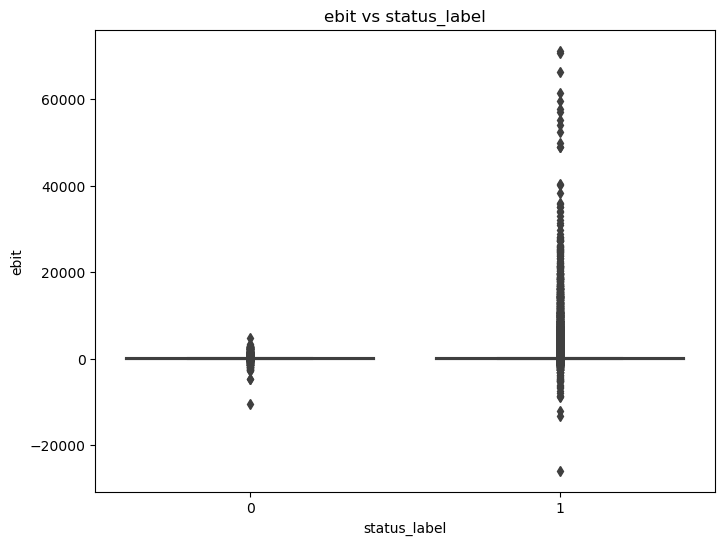

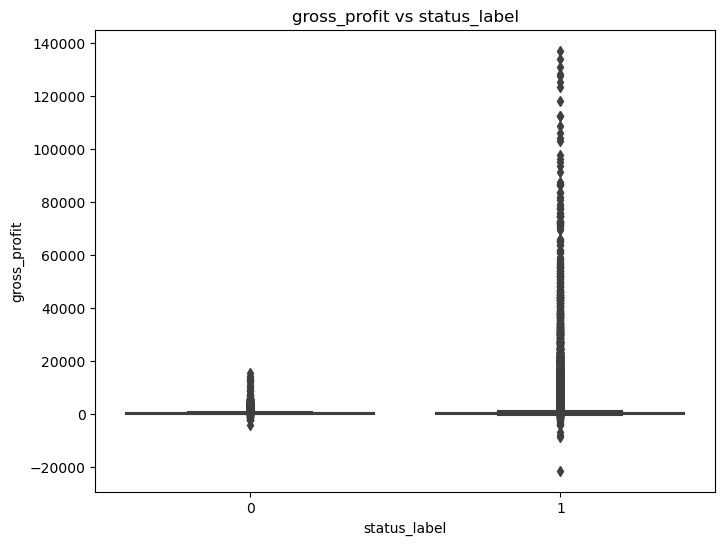

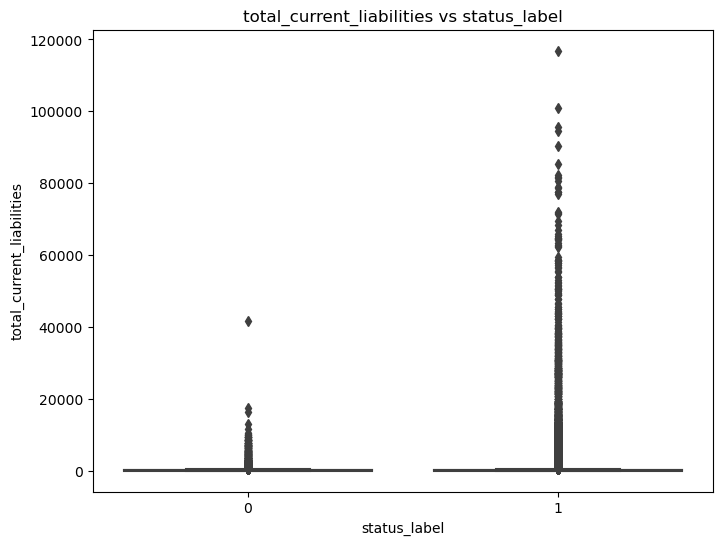

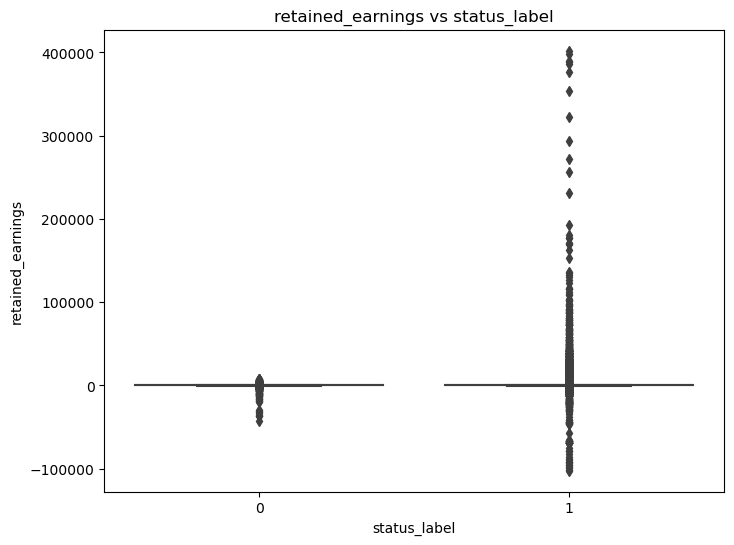

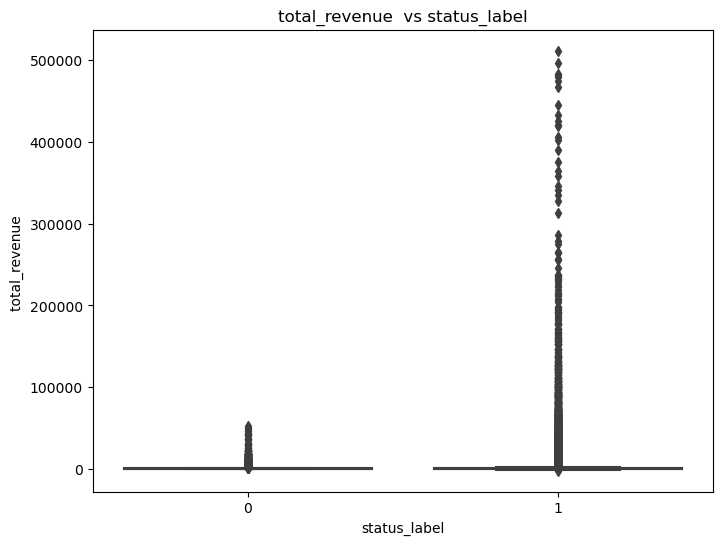

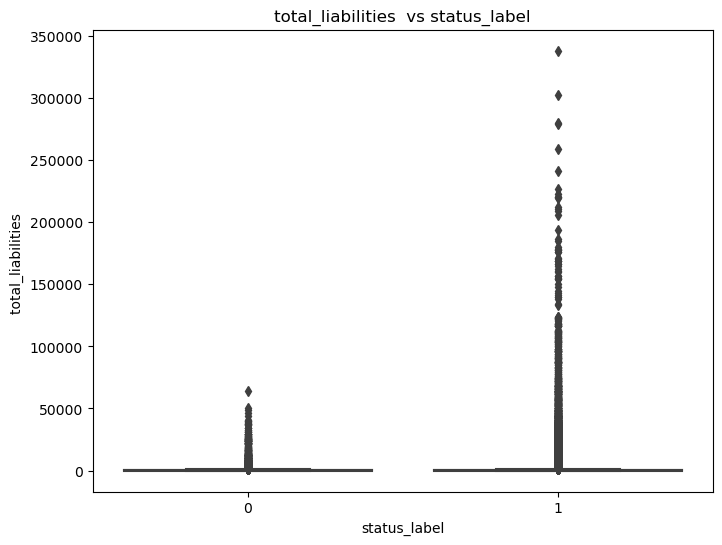

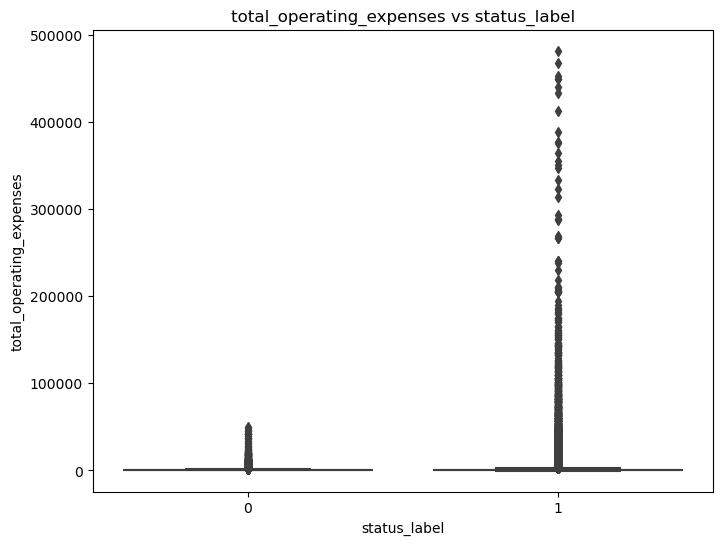

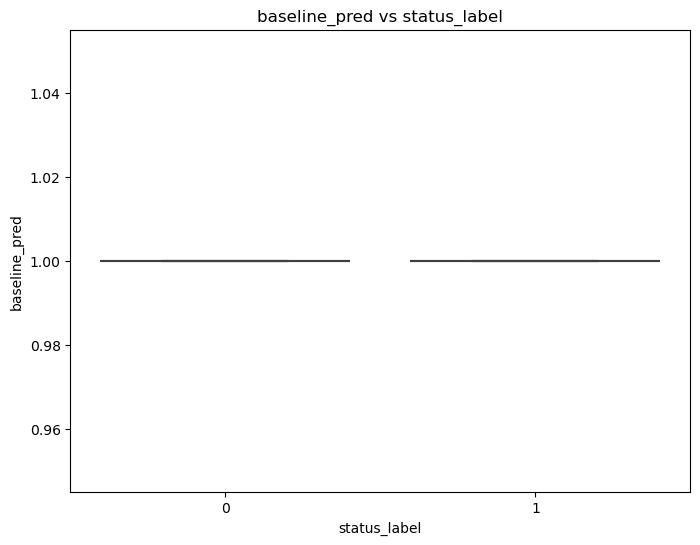

In [19]:
# Bivariate exploration: Plot each variable against your target

# For a categorical target variable, your target can be on the x-axis, and numeric variables on the y
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='status_label', y=col, data=df)
    plt.title(f'{col} vs status_label')
    plt.show()

# For a numeric target variable, your target can be on the y-axis, and independent variables on the x-axis
for col in categorical_cols:
    if df[col].nunique() < 10:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=col, y='status_label', data=df)
        plt.title(f'status_label vs {col}')
        plt.xticks(rotation=45)
        plt.show()

## Multivariate exploration

In [35]:
# Multivariate exploration: Visualize multiple (3+) variables at once

# With a categorical target, plot each categorical variable (x-axis) against each numeric variable (y-axis) and set color to your categorical target variable
for cat in categorical_cols:
    if df[cat].nunique() < 10:
        for num in numerical_cols:
            plt.figure(figsize=(8, 6))
            sns.violinplot(x=cat, y=num, hue='status_label', data=df)
            plt.title(f'{num} vs {cat} by status_label')
            plt.xticks(rotation=45)
            plt.show()

# When plotting a numeric target against categorical independent variables, your y-axis is the target and your x-axis is categorical variables
# Here we can set color to be another one of the categorical variables. One you are most interested in, for example
# Let's choose 'status_label' as the color
for cat in categorical_cols:
    if df[cat].nunique() < 10:
        plt.figure(figsize=(8, 6))
        sns.violinplot(x='status_label', y=cat, hue='status_label', data=df)
        plt.title(f'status_label vs {cat}')
        plt.xticks(rotation=45)
        plt.show()

In [21]:
# e.get_spearmanr_regplots(df, 'status_label')

In [36]:
# e.explore_bivariate(tr, target, categorical_cols, numerical_cols)

In [ ]:
# e.explore_bivariate(tr, target, categorical_cols, numerical_cols)

In [ ]:
# sns.swarmplot(data=tr, x=target, y=num_cols[0], color='lightgray')

In [ ]:
# for col in num_cols:
    # e.explore_bivariate_quant(tr, target, col)

In [ ]:
# for ncol in num_cols:
    # e.explore_bivariate_quant(tr, target, ncol)

In [37]:
# e.explore_multivariate(tr, target, categorical_cols, numerical_cols)

## Question 1: How has the number of bankruptcies changed over the years?

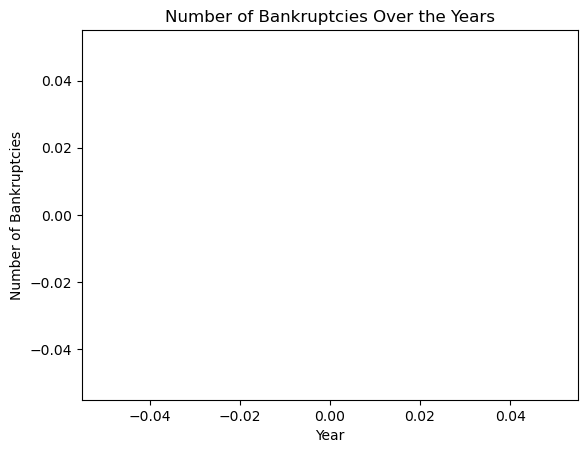

In [27]:
# Question 2: How has the number of bankruptcies changed over the years?
bankruptcies_per_year = df[df['status_label'] == 'failed']['year'].value_counts().sort_index()
bankruptcies_per_year.plot(kind='line')
plt.title('Number of Bankruptcies Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Bankruptcies')
plt.show()

### Analyze "x" vs "y" with stats

<div class="alert alert-block alert-info"> 
    
<b>Summarize</b>
    
- <b>notes</b>
 
</div>

<div class="alert alert-block alert-success"> 
<b>Summarize</b>
    • note 1
</div>

## Question 2: How do the total assets and total liabilities compare between bankrupt and non-bankrupt companies?

### Analyze "a" vs "b" with stats

### Summarize

<div class="alert alert-block alert-info"> <b>Summarize</b>
       notes
 </div>

## Question 3: Are there any financial indicators that are significantly different between the companies that are alive and those that are bankrupt?

In [34]:
df.status_label.value_counts()

1    73462
0     5220
Name: status_label, dtype: int64

In [33]:
# Question 3: Are there any financial indicators that are significantly different between the companies that are alive and those that are bankrupt?
from scipy.stats import ttest_ind

# alive = df[df['status_label'] == 1]
# bankrupt = df[df['status_label'] == 0]

t_stat, p_val = ttest_ind(1, 0, nan_policy='omit')
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

T-statistic: nan
P-value: nan


### Analyze "a" vs "b" with stats

### Summarize

## Question 4: Can we visualize the correlation between the different financial indicators and the status of the company?

### Analyze "a" vs "b" with stats

### Summarize

### Exploration Summary
-
-
-

### (As Required) Features I am moving to modeling with
1.
2.
3.
4.

or NONE

## Modeling

* Evaluation Metrics (example: I will use R^2 and Root Mean Square Error (RMSE) as my evaluation metrics)
    * for R^2, the value is in the range 0-1; closer to 1.0 is better; baseline is 0.0
    * for RMSE, the lower the value the better; baseline is .0248921
* The average target is xxx which is the baseline prediction
* I will evaluate x different model types and various hyperparameter configurations
    * (Example: The four model types are Ordinary Least Squares (OLS), LassoLars, Polynomial Regression, Generalized Linear Model (GLM))
* Models will be evaluated on train and validate data
* The model that performs the best will then be evaluated on test

In [ ]:
baseline_accuracy = (df.baseline_pred == df.status_label).mean()
baseline_accuracy

### Comparing Models

### Comparing Models Summary
* summarize the model performance
* ...
* I have chosen to move forward with the ___ model on test

### Best Model (model name) on Test

### Predictions Graphs

## Modeling Summary

## Conclusions

### Exploration
-
-

### Modeling
-
-

### Recommendations
-
-

# Next Steps
-
-